20.12.29에 HR, PPGA에서 복사한 파일로 HR, HRV, MBP만 남기고 코드 깔끔하게 정리한 버전

- def Confusion Matrix

In [2]:
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(3,3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    #thresh = cm.max() / 2.
    thresh = np.average(cm)
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.0f}'.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# HR

## PACU HR  (per input 20s)

In [24]:
import numpy as np
import pandas as pd
import os, pickle, sys
from scipy import signal

### input 설정
SRATE = 250 # 250Hz

### 필요한 정보
ecg_peak_path = '../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_5min_seg/'
df_preprocess_pacu = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))
opid_test = pickle.load(open('../DL_model/opid_test', 'rb'))

### Dataframe 및 저장할 list 생성
df_HR = pd.DataFrame(columns=['file_path']+[str(i) for i in range(25,58)])
x_test_hr_pacu, x_hr_mask_pacu = [], []

cnt = 0
for _, row in df_preprocess_pacu.iterrows():
    # 해당 caseid가 test set에 속하는 경우
    if row['opid'] in opid_test:
        cnt += 1
        print('loading data {}/915 ...'.format(cnt), end='')
        df_HR.loc[cnt-1,'file_path'] = row['file_path']
        
        
        # 한 NRS에 대해 augmentated된 input 확인
        for i in range(25,58):
            # input이 전처리 통과한 경우
            if row[str(i)][0]:
                # vital data - ECG (250Hz)
                ecg_peaks = pickle.load(open(ecg_peak_path+row['file_path']+'_'+str(i), 'rb'))
                ecg_peaks = np.array(ecg_peaks)
                

                hr_list = []
                for j in range(1,len(ecg_peaks)):
                    hr = 60/(ecg_peaks[j]-ecg_peaks[j-1])*SRATE
                    if 30<hr<150:
                        hr_list.append(hr)

                if hr_list:
                    df_HR.loc[cnt-1, str(i)] = np.mean(hr_list)
                    x_test_hr_pacu.append(np.mean(hr_list))
                    x_hr_mask_pacu.append(True)

                else:
                    x_hr_mask_pacu.append(False)


        print('completed')

pickle.dump(df_HR,open('df_HR','wb'))
len(x_test_hr_pacu),len(x_hr_mask_pacu)

loading data 1/915 ...completed
loading data 2/915 ...completed
loading data 3/915 ...completed
loading data 4/915 ...completed
loading data 5/915 ...completed
loading data 6/915 ...completed
loading data 7/915 ...completed
loading data 8/915 ...completed
loading data 9/915 ...completed
loading data 10/915 ...completed
loading data 11/915 ...completed
loading data 12/915 ...completed
loading data 13/915 ...completed
loading data 14/915 ...completed
loading data 15/915 ...completed
loading data 16/915 ...completed
loading data 17/915 ...completed
loading data 18/915 ...completed
loading data 19/915 ...completed
loading data 20/915 ...completed
loading data 21/915 ...completed
loading data 22/915 ...completed
loading data 23/915 ...completed
loading data 24/915 ...completed
loading data 25/915 ...completed
loading data 26/915 ...completed
loading data 27/915 ...completed
loading data 28/915 ...completed
loading data 29/915 ...completed
loading data 30/915 ...completed
loading data 31/915

loading data 248/915 ...completed
loading data 249/915 ...completed
loading data 250/915 ...completed
loading data 251/915 ...completed
loading data 252/915 ...completed
loading data 253/915 ...completed
loading data 254/915 ...completed
loading data 255/915 ...completed
loading data 256/915 ...completed
loading data 257/915 ...completed
loading data 258/915 ...completed
loading data 259/915 ...completed
loading data 260/915 ...completed
loading data 261/915 ...completed
loading data 262/915 ...completed
loading data 263/915 ...completed
loading data 264/915 ...completed
loading data 265/915 ...completed
loading data 266/915 ...completed
loading data 267/915 ...completed
loading data 268/915 ...completed
loading data 269/915 ...completed
loading data 270/915 ...completed
loading data 271/915 ...completed
loading data 272/915 ...completed
loading data 273/915 ...completed
loading data 274/915 ...completed
loading data 275/915 ...completed
loading data 276/915 ...completed
loading data 2

loading data 490/915 ...completed
loading data 491/915 ...completed
loading data 492/915 ...completed
loading data 493/915 ...completed
loading data 494/915 ...completed
loading data 495/915 ...completed
loading data 496/915 ...completed
loading data 497/915 ...completed
loading data 498/915 ...completed
loading data 499/915 ...completed
loading data 500/915 ...completed
loading data 501/915 ...completed
loading data 502/915 ...completed
loading data 503/915 ...completed
loading data 504/915 ...completed
loading data 505/915 ...completed
loading data 506/915 ...completed
loading data 507/915 ...completed
loading data 508/915 ...completed
loading data 509/915 ...completed
loading data 510/915 ...completed
loading data 511/915 ...completed
loading data 512/915 ...completed
loading data 513/915 ...completed
loading data 514/915 ...completed
loading data 515/915 ...completed
loading data 516/915 ...completed
loading data 517/915 ...completed
loading data 518/915 ...completed
loading data 5

loading data 736/915 ...completed
loading data 737/915 ...completed
loading data 738/915 ...completed
loading data 739/915 ...completed
loading data 740/915 ...completed
loading data 741/915 ...completed
loading data 742/915 ...completed
loading data 743/915 ...completed
loading data 744/915 ...completed
loading data 745/915 ...completed
loading data 746/915 ...completed
loading data 747/915 ...completed
loading data 748/915 ...completed
loading data 749/915 ...completed
loading data 750/915 ...completed
loading data 751/915 ...completed
loading data 752/915 ...completed
loading data 753/915 ...completed
loading data 754/915 ...completed
loading data 755/915 ...completed
loading data 756/915 ...completed
loading data 757/915 ...completed
loading data 758/915 ...completed
loading data 759/915 ...completed
loading data 760/915 ...completed
loading data 761/915 ...completed
loading data 762/915 ...completed
loading data 763/915 ...completed
loading data 764/915 ...completed
loading data 7

(14522, 14522)

In [26]:
x_hr_abs = np.array(x_test_hr_pacu, np.float32)
x_hr_mask = np.array(x_hr_mask_pacu)


# 저장
save_delong = 'Dataset/'
print('saving...', end='', flush=True)
np.savez_compressed(save_delong+'x_hr_pacu.npz', x_hr_abs)
np.savez_compressed(save_delong+'x_hr_mask_pacu.npz', x_hr_mask)


print('done', flush=True)

y_test = np.load('../DL_model/dataset/preprocess6/input/'+'y_test_pacu.npz',allow_pickle=True)['arr_0']
y_hr_abs=y_test[x_hr_mask]
y_hr_abs_bin = y_hr_abs >=4

len(y_bin)

saving...done


## preop HR (per input 20s)

In [4]:
import numpy as np
import pandas as pd
import os, pickle, sys
from scipy import signal


### input 설정
SRATE = 250 # 250Hz
LEN_INPUT = 20 # input 10s
OVERLAP = 2


### 필요한 정보
ecg_peak_path = '../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_preop_2min/'
df_preprocess_preop = pickle.load(open('../DL_model/cache/preprocess3/input3/df_preprocess_preop_agender','rb'))
caseid_test = pickle.load(open('../DL_model/opid_test', 'rb'))
df_preop_match = pickle.load(open('../Preprocessing/df_preop_match', 'rb'))

### Dataframe 및 저장할 list 생성
df_HR_preop = pd.DataFrame(columns=['file_path', 'HR']+[str(i) for i in range(31,52)])
x_test_hr_preop, x_hr_mask_preop = [], []

cnt, wr = 0, 0
for _, row in df_preprocess_preop.iterrows():
    # 해당 caseid가 test set에 속하는 경우
    if row['caseids'] in caseid_test:
        cnt += 1
        print('loading data {}/{} ...'.format(cnt, len(df_preprocess_preop)), end='')

        # vital data - ECG (250Hz)
        preop_path = df_preop_match[df_preop_match['file_path']==row['file_path'].split(',')[2]]['fileid'].values[0][3:]
        ecg_peaks = pickle.load(open(ecg_peak_path+preop_path, 'rb'))
        ecg_peaks = np.array(ecg_peaks)


        df_HR_preop.loc[cnt-1,'file_path'] = row['file_path']
        # 한 NRS에 대해 augmentated된 input 확인

        for i in range(30,51):
            # input이 전처리 통과한 경우
            if row[str(i+1)][0]:
                start_idx = i*OVERLAP*SRATE # 500i
                end_idx = (i*OVERLAP+LEN_INPUT)*SRATE # 500i + 1000


                # HR 계산 from ECG peaks
                inp_ecg_peaks = ecg_peaks[(start_idx<=ecg_peaks)&(ecg_peaks<end_idx)]

                hr_list = []
                for j in range(1,len(inp_ecg_peaks)):
                    hr = 60/(inp_ecg_peaks[j]-inp_ecg_peaks[j-1])*SRATE
                    if 30<hr<150:
                        hr_list.append(hr)

                if hr_list:
                    df_HR_preop.loc[cnt-1, str(i+1)] = np.mean(hr_list)
                    x_test_hr_preop.append(np.mean(hr_list))
                    y_test_hr_preop.append(float(row['file_path'].split(',')[0]))
                    x_hr_mask_preop.append(True)
                
                else:
                    x_hr_mask_preop.append(False)

        print('completed')

loading data 1/3861 ...completed
loading data 2/3861 ...completed
loading data 3/3861 ...completed
loading data 4/3861 ...completed
loading data 5/3861 ...completed
loading data 6/3861 ...completed
loading data 7/3861 ...completed
loading data 8/3861 ...completed
loading data 9/3861 ...completed
loading data 10/3861 ...completed
loading data 11/3861 ...completed
loading data 12/3861 ...completed
loading data 13/3861 ...completed
loading data 14/3861 ...completed
loading data 15/3861 ...completed
loading data 16/3861 ...completed
loading data 17/3861 ...completed
loading data 18/3861 ...completed
loading data 19/3861 ...completed
loading data 20/3861 ...completed
loading data 21/3861 ...completed
loading data 22/3861 ...completed
loading data 23/3861 ...completed
loading data 24/3861 ...completed
loading data 25/3861 ...completed
loading data 26/3861 ...completed
loading data 27/3861 ...completed
loading data 28/3861 ...completed
loading data 29/3861 ...completed
loading data 30/3861 ..

loading data 250/3861 ...completed
loading data 251/3861 ...completed
loading data 252/3861 ...completed
loading data 253/3861 ...completed
loading data 254/3861 ...completed
loading data 255/3861 ...completed
loading data 256/3861 ...completed
loading data 257/3861 ...completed
loading data 258/3861 ...completed
loading data 259/3861 ...completed
loading data 260/3861 ...completed
loading data 261/3861 ...completed
loading data 262/3861 ...completed
loading data 263/3861 ...completed
loading data 264/3861 ...completed
loading data 265/3861 ...completed
loading data 266/3861 ...completed
loading data 267/3861 ...completed
loading data 268/3861 ...completed
loading data 269/3861 ...completed
loading data 270/3861 ...completed
loading data 271/3861 ...completed
loading data 272/3861 ...completed
loading data 273/3861 ...completed
loading data 274/3861 ...completed
loading data 275/3861 ...completed
loading data 276/3861 ...completed
loading data 277/3861 ...completed


## concatenate, save, open

In [7]:
x_hr_abs = np.concatenate([x_test_hr_pacu, x_test_hr_preop])
x_hr_mask = np.concatenate([x_hr_mask_pacu, x_hr_mask_preop])

x_hr_abs = np.array(x_hr_abs, np.float32)
x_hr_mask = np.array(x_hr_mask)

len(x_hr_abs)

8795

In [8]:
# 저장
save_delong = 'Dataset/'
print('saving...', end='', flush=True)
np.savez_compressed(save_delong+'x_hr.npz', x_hr_abs)
np.savez_compressed(save_delong+'x_hr_mask.npz', x_hr_mask)


print('done', flush=True)

saving...done


In [18]:
# 열기
x_hr_abs = np.load('Dataset/x_hr_pacu.npz',allow_pickle = True)['arr_0']
x_hr_mask = np.load('Dataset/x_hr_mask_pacu.npz',allow_pickle = True)['arr_0']
y_test = np.load('../DL_model/dataset/preprocess6/input/'+'y_test_pacu.npz',allow_pickle=True)['arr_0']

y_hr_abs=y_test[x_hr_mask]
y_hr_abs_n = y_hr_abs[(y_hr_abs<4)|(y_hr_abs>6)]
x_hr_abs = x_hr_abs[(y_hr_abs<4)|(y_hr_abs>6)]
y_hr_abs_bin = y_hr_abs_n >=7

len(y_hr_abs_bin)

5216

In [35]:
 np.mean(y_hr_abs<4)+np.mean(y_hr_abs>6)

0.35917917642198044

## Evaluation

In [14]:
#sample weight
w_samp_abs_1 = np.ones(shape=len(y_hr_abs))

w_samp_abs_2 = np.ones(shape=len(y_hr_abs))
w_samp_abs_2[y_hr_abs<4] = len(y_hr_abs)/np.sum(y_hr_abs<4)
w_samp_abs_2[y_hr_abs>=4] = len(y_hr_abs)/np.sum(y_hr_abs>=4)
print('sample weight for NRS<4: {:.2f},  NRS>=4: {:.2f}'.format(len(y_hr_abs) / np.sum(y_hr_abs<4), len(y_hr_abs)/np.sum(y_hr_abs>=4)))

w_samp_abs_3 = np.ones(shape=len(y_hr_abs))
w_samp_abs_3[y_hr_abs<4] = len(y_hr_abs)/np.sum(y_hr_abs<4)
w_samp_abs_3[(y_hr_abs>=4)&(y_hr_abs<7)] = len(y_hr_abs)/np.sum((y_hr_abs>=4)&(y_hr_abs<7))
w_samp_abs_3[y_hr_abs>=7] = len(y_hr_abs)/np.sum(y_hr_abs>=7)

print('sample weight for NRS<4: {:.2f},  4<=NRS<7: {:.2f},  7<=NRS: {:.2f}'.format(len(y_hr_abs) / np.sum(y_hr_abs<4), len(y_hr_abs)/np.sum((y_hr_abs>=4)&(y_hr_abs<7)),len(y_hr_abs)/np.sum(y_hr_abs>=7) ))


sample weight for NRS<4: 1.96,  NRS>=4: 2.04
sample weight for NRS<4: 1.96,  4<=NRS<7: inf,  7<=NRS: 2.04


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in long_scalars
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in long_scalars
  


test set AUROC: 0.49928572100922997
test set AUPRC: 0.5201180728736644


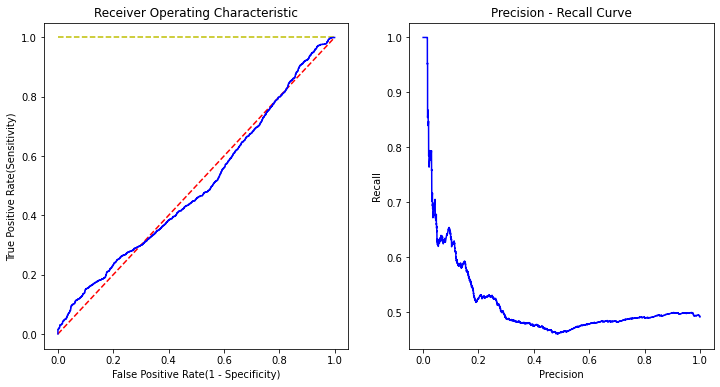

In [19]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from keras import losses, metrics
import matplotlib.pyplot as plt

# moderate pain
false_positive_rate, true_positive_rate, threshold = roc_curve(y_hr_abs_bin, x_hr_abs, sample_weight = w_samp_abs_1)
precision, recall, _ = precision_recall_curve(y_hr_abs_bin, x_hr_abs, sample_weight = w_samp_abs_1)
roc_auc = auc(false_positive_rate, true_positive_rate)
prc_auc = auc(recall, precision)
print('test set AUROC:', roc_auc)
print('test set AUPRC:', prc_auc)



# Plotting ROC, PRC
fig = plt.figure(figsize=(12,6))

# ax1: auroc
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Receiver Operating Characteristic')
ax1.set_xlabel("False Positive Rate(1 - Specificity)")
ax1.set_ylabel('True Positive Rate(Sensitivity)')
ax1.plot([0,1],[1,1],'y--')
ax1.plot([0,1],[0,1],'r--')
ax1.plot(false_positive_rate, true_positive_rate, 'b', label='moderate pain (AUC = %0.4f)'% roc_auc)

# ax2: auprc
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Precision - Recall Curve')
ax2.set_xlabel("Precision")
ax2.set_ylabel('Recall')
ax2.plot(recall, precision, 'b', label='moderate pain (AUC = %0.4f)'% prc_auc)

#plt.savefig(test_path + '/roc_prc.png', bbox_inches="tight", pad_inches=0.5)

### 2class 0.5508, 0.5426 / 3class0.5490, 0.7005

### confusion matrix

optimal thval: 76.3704
Confusion matrix, without normalization
[[2627 1320]
 [2790 2607]]
Confusion matrix, without normalization
[[6219.07 3124.93]
 [4830.42 4513.58]]


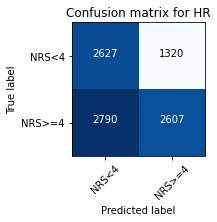

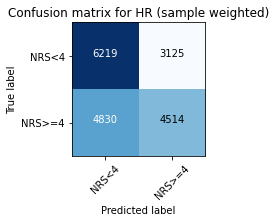

In [368]:
from sklearn.metrics import confusion_matrix, roc_curve


# calculate optimal threshold that minimize 'sensitivity(TPR) + specificity(1-FPR)''
fpr, tpr, thvals = roc_curve(y_hr_abs_bin, x_hr_abs)
optimal_idx = np.argmax(tpr-fpr)
thval = thvals[optimal_idx]
print('optimal thval: {:.4f}'.format(thval))
                             
#precision1, recall1, _ = precision_recall_curve(y_test_pacu_bin, y_pred)

# confusion matrix
cnf_matrix = confusion_matrix(y_hr_abs_bin, x_hr_abs>=thval)
cnf_matrix_weighted = confusion_matrix(y_hr_abs_bin, x_hr_abs>=thval)
np.set_printoptions(precision=2)
class_names = ['NRS<4','NRS>=4']

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion matrix for HR')

# HRV

## PACU HRV (per input 20s)

In [25]:
import numpy as np
import pandas as pd
import os, pickle, sys
from scipy import signal

### input 설정
SRATE = 250 # 250Hz

### 필요한 정보
ecg_peak_path = '../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_pacu_5min_seg/'
df_preprocess_pacu = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))
opid_test = pickle.load(open('../DL_model/opid_test', 'rb'))

### Dataframe 및 저장할 list 생성
df_RMSSD = pd.DataFrame(columns=['file_path']+[str(i) for i in range(25,58)])
x_test_RMSSD_pacu, x_hrv_mask_pacu = [], []

cnt = 0
test_mask = []
for _, row in df_preprocess_pacu.iterrows():
    # 해당 caseid가 test set에 속하는 경우
    if row['opid'] in opid_test:
        cnt += 1
        print('loading data {}/915 ...'.format(cnt), end='')
        df_RMSSD.loc[cnt-1,'file_path'] = row['file_path']


        # 한 NRS에 대해 augmentated된 input 확인
        for i in range(25,58):
            # input이 전처리 통과한 경우
            if row[str(i)][0]:
                # vital data - ECG (250Hz)
                ecg_peaks = pickle.load(open(ecg_peak_path+row['file_path']+'_'+str(i), 'rb'))
                ecg_peaks = np.array(ecg_peaks)

                
                # HR 계산 from ECG peaks
                peaks=[peak for peak in ecg_peaks]
                RRi = [(peaks[i+1]-peaks[i])/SRATE for i in range(len(peaks)-1)]
                NNi = [y for y in RRi if 0.4<y<1.2]
                RMSSD = [NNi[i+1]-NNi[i] for i in range(len(NNi)-1)]
                RMSSD = np.array(RMSSD)

                if np.sum(NNi) < 10:
                    RMSSD= np.nan
                    x_hrv_mask_pacu.append(False)
                    
                else:                                
                    RMSSD= np.std(RMSSD)                
                    df_RMSSD.loc[cnt-1, str(i)] = RMSSD

                    x_test_RMSSD_pacu.append(RMSSD)          
                    x_hrv_mask_pacu.append(True)

                    
        print('completed')

pickle.dump(df_RMSSD,open('df_RMSSD','wb'))
len(x_test_RMSSD_pacu),len(x_hrv_mask_pacu)

loading data 1/915 ...completed
loading data 2/915 ...completed
loading data 3/915 ...completed
loading data 4/915 ...completed
loading data 5/915 ...completed
loading data 6/915 ...completed
loading data 7/915 ...completed
loading data 8/915 ...completed
loading data 9/915 ...completed
loading data 10/915 ...completed
loading data 11/915 ...completed
loading data 12/915 ...completed
loading data 13/915 ...completed
loading data 14/915 ...completed
loading data 15/915 ...completed
loading data 16/915 ...completed
loading data 17/915 ...completed
loading data 18/915 ...completed
loading data 19/915 ...completed
loading data 20/915 ...completed
loading data 21/915 ...completed
loading data 22/915 ...completed
loading data 23/915 ...completed
loading data 24/915 ...completed
loading data 25/915 ...completed
loading data 26/915 ...completed
loading data 27/915 ...completed
loading data 28/915 ...completed
loading data 29/915 ...completed
loading data 30/915 ...completed
loading data 31/915

loading data 249/915 ...completed
loading data 250/915 ...completed
loading data 251/915 ...completed
loading data 252/915 ...completed
loading data 253/915 ...completed
loading data 254/915 ...completed
loading data 255/915 ...completed
loading data 256/915 ...completed
loading data 257/915 ...completed
loading data 258/915 ...completed
loading data 259/915 ...completed
loading data 260/915 ...completed
loading data 261/915 ...completed
loading data 262/915 ...completed
loading data 263/915 ...completed
loading data 264/915 ...completed
loading data 265/915 ...completed
loading data 266/915 ...completed
loading data 267/915 ...completed
loading data 268/915 ...completed
loading data 269/915 ...completed
loading data 270/915 ...completed
loading data 271/915 ...completed
loading data 272/915 ...completed
loading data 273/915 ...completed
loading data 274/915 ...completed
loading data 275/915 ...completed
loading data 276/915 ...completed
loading data 277/915 ...completed
loading data 2

loading data 503/915 ...completed
loading data 504/915 ...completed
loading data 505/915 ...completed
loading data 506/915 ...completed
loading data 507/915 ...completed
loading data 508/915 ...completed
loading data 509/915 ...completed
loading data 510/915 ...completed
loading data 511/915 ...completed
loading data 512/915 ...completed
loading data 513/915 ...completed
loading data 514/915 ...completed
loading data 515/915 ...completed
loading data 516/915 ...completed
loading data 517/915 ...completed
loading data 518/915 ...completed
loading data 519/915 ...completed
loading data 520/915 ...completed
loading data 521/915 ...completed
loading data 522/915 ...completed
loading data 523/915 ...completed
loading data 524/915 ...completed
loading data 525/915 ...completed
loading data 526/915 ...completed
loading data 527/915 ...completed
loading data 528/915 ...completed
loading data 529/915 ...completed
loading data 530/915 ...completed
loading data 531/915 ...completed
loading data 5

loading data 757/915 ...completed
loading data 758/915 ...completed
loading data 759/915 ...completed
loading data 760/915 ...completed
loading data 761/915 ...completed
loading data 762/915 ...completed
loading data 763/915 ...completed
loading data 764/915 ...completed
loading data 765/915 ...completed
loading data 766/915 ...completed
loading data 767/915 ...completed
loading data 768/915 ...completed
loading data 769/915 ...completed
loading data 770/915 ...completed
loading data 771/915 ...completed
loading data 772/915 ...completed
loading data 773/915 ...completed
loading data 774/915 ...completed
loading data 775/915 ...completed
loading data 776/915 ...completed
loading data 777/915 ...completed
loading data 778/915 ...completed
loading data 779/915 ...completed
loading data 780/915 ...completed
loading data 781/915 ...completed
loading data 782/915 ...completed
loading data 783/915 ...completed
loading data 784/915 ...completed
loading data 785/915 ...completed
loading data 7

(14414, 14522)

In [35]:
x_RMSSD = np.array(x_test_RMSSD_pacu, np.float32) * (-1)
x_hrv_mask = np.array(x_hrv_mask_pacu)

# 저장
save_delong = 'Dataset/'
print('saving...', end='', flush=True)
np.savez_compressed(save_delong+'x_RMSSD_pacu.npz', x_RMSSD)
np.savez_compressed(save_delong+'x_HRV_mask_pacu.npz', x_hrv_mask)

print('done', flush=True)

y_test = np.load('../DL_model/dataset/preprocess6/input/'+'y_test_pacu.npz',allow_pickle=True)['arr_0']
y_hrv =y_test[x_hrv_mask]
y_hrv_bin = y_hrv >=4

len(y_hrv_bin)

saving...done


14414

## preop HRV (per input 20s)

In [32]:
import numpy as np
import pandas as pd
import os, pickle, sys
from scipy import signal


### input 설정
SRATE = 250 # 250Hz
LEN_INPUT = 20 # input 10s
OVERLAP = 2

non_preop_list=[]
ecg_peak_path = '../../cranberry2/Preprocessing/cache/peaks/ECG_250Hz_preop_2min/'
df_preprocess_preop = pickle.load(open('../DL_model/cache/preprocess3/input3/df_preprocess_preop_agender','rb'))
    
### test set에 해당하는 file_path
caseid_test = pickle.load(open('../DL_model/opid_test', 'rb'))
df_preop_match = pickle.load(open('../Preprocessing/df_preop_match', 'rb'))

### Dataframe 및 저장할 list 생성
df_RMSSD_preop = pd.DataFrame(columns=['file_path']+[str(i) for i in range(31,52)])
x_test_RMSSD_preop, x_hrv_mask_preop = [], []


cnt = 0
for _, row in df_preprocess_preop.iterrows():
    # 해당 caseid가 test set에 속하는 경우
    if row['caseids'] in caseid_test:
        cnt += 1
        print('loading data {}/{} ...'.format(cnt, '371'), end='')

        # ECG peaks
        preop_path = df_preop_match[df_preop_match['file_path']==row['file_path'].split(',')[2]]['fileid'].values[0][3:]
        ecg_peaks = pickle.load(open(ecg_peak_path+preop_path, 'rb'))
        ecg_peaks = np.array(ecg_peaks)

        df_RMSSD_preop.loc[cnt-1,'file_path'] = row['file_path']        
              
              
        # 한 NRS에 대해 augmentated된 input 확인
        for i in range(30,51):
            # input이 전처리 통과한 경우
            if row[str(i+1)][0]:
                start_idx = i*OVERLAP*SRATE # 500i
                end_idx = (i*OVERLAP+LEN_INPUT)*SRATE # 500i + 1000

                # HR 계산 from ECG peaks
                inp_ecg_peaks = ecg_peaks[(start_idx<=ecg_peaks)&(ecg_peaks<end_idx)]


                peaks=[peak for peak in inp_ecg_peaks]
                RRi = [(peaks[i+1]-peaks[i])/SRATE for i in range(len(peaks)-1)]
                NNi = [y for y in RRi if 0.4<y<1.2]
                RMSSD = [NNi[i+1]-NNi[i] for i in range(len(NNi)-1)]
                RMSSD = np.array(RMSSD)
                NNi = np.array(NNi)


                if np.sum(NNi) <10:
                    mean= np.nan
                    SSDN = np.nan
                    RMSSD= np.nan
                    x_hrv_mask_preop.append(False)
                else:                
                    mean= np.mean(NNi)
                    SSDN = np.std(NNi)
                    RMSSD= np.std(RMSSD)
                    df_SSDN_preop.loc[cnt-1, str(i+1)] = SSDN
                    df_RMSSD_preop.loc[cnt-1, str(i+1)] = RMSSD                    
                
                    x_test_SSDN_preop.append(SSDN)
                    x_test_RMSSD_preop.append(RMSSD)
                    y_test_hrv_preop.append(float(row['file_path'].split(',')[0]))
                    x_hrv_mask_preop.append(True)

        print('completed')

loading data 1/371 ...completed
loading data 2/371 ...completed
loading data 3/371 ...completed
loading data 4/371 ...completed
loading data 5/371 ...completed
loading data 6/371 ...completed
loading data 7/371 ...completed
loading data 8/371 ...completed
loading data 9/371 ...completed
loading data 10/371 ...completed
loading data 11/371 ...completed
loading data 12/371 ...completed
loading data 13/371 ...completed
loading data 14/371 ...completed
loading data 15/371 ...completed
loading data 16/371 ...completed
loading data 17/371 ...completed
loading data 18/371 ...completed
loading data 19/371 ...completed
loading data 20/371 ...completed
loading data 21/371 ...completed
loading data 22/371 ...completed
loading data 23/371 ...completed
loading data 24/371 ...completed
loading data 25/371 ...completed
loading data 26/371 ...completed
loading data 27/371 ...completed
loading data 28/371 ...completed
loading data 29/371 ...completed
loading data 30/371 ...completed
loading data 31/371

loading data 249/371 ...completed
loading data 250/371 ...completed
loading data 251/371 ...completed
loading data 252/371 ...completed
loading data 253/371 ...completed
loading data 254/371 ...completed
loading data 255/371 ...completed
loading data 256/371 ...completed
loading data 257/371 ...completed
loading data 258/371 ...completed
loading data 259/371 ...completed
loading data 260/371 ...completed
loading data 261/371 ...completed
loading data 262/371 ...completed
loading data 263/371 ...completed
loading data 264/371 ...completed
loading data 265/371 ...completed
loading data 266/371 ...completed
loading data 267/371 ...completed
loading data 268/371 ...completed
loading data 269/371 ...completed
loading data 270/371 ...completed
loading data 271/371 ...completed
loading data 272/371 ...completed
loading data 273/371 ...completed
loading data 274/371 ...completed
loading data 275/371 ...completed
loading data 276/371 ...completed
loading data 277/371 ...completed


## concatenate, save, open

In [33]:
x_RMSSD = np.concatenate([x_test_RMSSD_pacu, x_test_RMSSD_preop])
x_hrv_mask = np.concatenate([x_hrv_mask_pacu, x_hrv_mask_preop])

x_RMSSD = np.array(x_RMSSD, np.float32) * (-1)
x_hrv_mask = np.array(x_hrv_mask)

len(x_SSDN)

7941

In [35]:
# 저장
save_delong = 'Dataset/'
print('saving...', end='', flush=True)
np.savez_compressed(save_delong+'x_RMSSD.npz', x_RMSSD)
np.savez_compressed(save_delong+'x_HRV_mask.npz', x_hrv_mask)

print('done', flush=True)

saving...done


In [24]:
# 열기
x_RMSSD = np.load('Dataset/x_RMSSD_pacu.npz',allow_pickle = True)['arr_0']
x_hrv_mask = np.load('Dataset/x_HRV_mask_pacu.npz',allow_pickle = True)['arr_0']
y_test = np.load('../DL_model/dataset/preprocess6/input/'+'y_test_pacu.npz',allow_pickle=True)['arr_0']

y_hrv=y_test[x_hrv_mask]
y_hrv_n = y_hrv[(y_hrv<4)|(y_hrv>6)]
x_RMSSD = x_RMSSD[(y_hrv<4)|(y_hrv>6)]
y_hrv_bin = y_hrv_n >=7

len(x_RMSSD),len(y_hrv_bin)

(5165, 5165)

In [34]:
np.mean(y_hrv_bin), np.mean(y_hrv<4)+np.mean(y_hrv>6)

(0.49390125847047434, 0.3583321770500902)

## Evaluation

In [25]:
w_samp_min_1 = np.ones(shape=len(y_hrv))

w_samp_min_2 = np.ones(shape=len(y_hrv))
w_samp_min_2[y_hrv<4] = len(y_hrv)/np.sum(y_hrv<4)
w_samp_min_2[y_hrv>=4] = len(y_hrv)/np.sum(y_hrv>=4)
print('sample weight for NRS<4: {:.2f},  NRS>=4: {:.2f}'.format(len(y_hrv) / np.sum(y_hrv<4), len(y_hrv)/np.sum(y_hrv>=4)))

w_samp_min_3 = np.ones(shape=len(y_hrv))
w_samp_min_3[y_hrv<4] = len(y_hrv)/np.sum(y_hrv<4)
w_samp_min_3[(y_hrv>=4)&(y_hrv<7)] = len(y_hrv)/np.sum((y_hrv>=4)&(y_hrv<7))
w_samp_min_3[y_hrv>=7] = len(y_hrv)/np.sum(y_hrv>=7)

print('sample weight for NRS<4: {:.2f},  4<=NRS<7: {:.2f},  7<=NRS: {:.2f}'.format(len(y_hrv) / np.sum(y_hrv<4), len(y_hrv)/np.sum((y_hrv>=4)&(y_hrv<7)),len(y_hrv)/np.sum(y_hrv>=7) ))


sample weight for NRS<4: 5.51,  NRS>=4: 1.22
sample weight for NRS<4: 5.51,  4<=NRS<7: 1.56,  7<=NRS: 5.65


test set AUROC: 0.4800928690520572
test set AUPRC: 0.46941956889498637


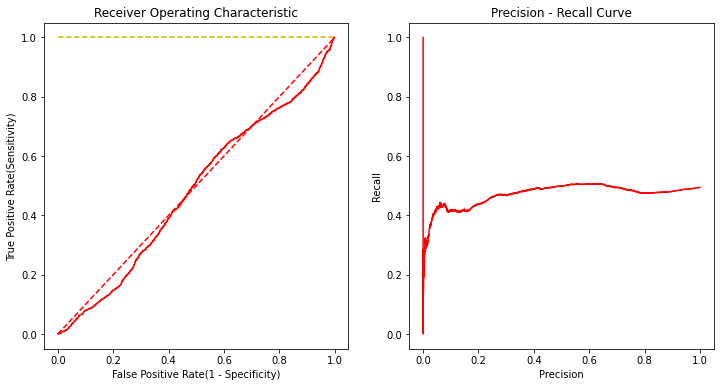

In [27]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from keras import losses, metrics
import matplotlib.pyplot as plt

# moderate pain
false_positive_rate, true_positive_rate, threshold = roc_curve(y_hrv_bin, x_RMSSD)#, sample_weight = w_samp_min_1)
precision, recall, _ = precision_recall_curve(y_hrv_bin, x_RMSSD)#, sample_weight = w_samp_min_1)
roc_auc = auc(false_positive_rate, true_positive_rate)
prc_auc = auc(recall, precision)
print('test set AUROC:', roc_auc)
print('test set AUPRC:', prc_auc)



# Plotting ROC, PRC
fig = plt.figure(figsize=(12,6))

# ax1: auroc
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Receiver Operating Characteristic')
ax1.set_xlabel("False Positive Rate(1 - Specificity)")
ax1.set_ylabel('True Positive Rate(Sensitivity)')
ax1.plot([0,1],[1,1],'y--')
ax1.plot([0,1],[0,1],'r--')
ax1.plot(false_positive_rate, true_positive_rate, 'r', label='moderate pain (AUC = %0.4f)'% roc_auc)

# ax2: auprc
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Precision - Recall Curve')
ax2.set_xlabel("Precision")
ax2.set_ylabel('Recall')
ax2.plot(recall, precision, 'r', label='moderate pain (AUC = %0.4f)'% prc_auc)

#plt.savefig(test_path + '/roc_prc.png', bbox_inches="tight", pad_inches=0.5)

### new) 2class 0.6051, 0.5888 / 3class 0.6072, 0.7386 / AUROC 0.6244, AUPRC 0.7012 / 기준 빼면 0.57, 0.65 

### Confusion matrix

optimal thval: -0.0116
Confusion matrix, without normalization
[[1275 1339]
 [5297 6503]]


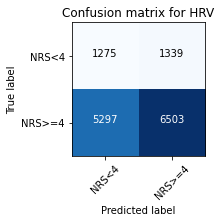

In [52]:
from sklearn.metrics import confusion_matrix, roc_curve


# calculate optimal threshold that minimize 'sensitivity(TPR) + specificity(1-FPR)''
fpr, tpr, thvals = roc_curve(y_hrv_bin, x_RMSSD)
optimal_idx = np.argmax(tpr-fpr)
thval = thvals[optimal_idx]
print('optimal thval: {:.4f}'.format(thval))
                             
#precision1, recall1, _ = precision_recall_curve(y_test_pacu_bin, y_pred)

# confusion matrix
cnf_matrix = confusion_matrix(y_hrv_bin, x_RMSSD>=thval)
cnf_matrix_weighted = confusion_matrix(y_hrv_bin, x_RMSSD>=thval)
np.set_printoptions(precision=2)
class_names = ['NRS<4','NRS>=4']

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion matrix for HRV')

# MBP

## PACU MBP (per input 20s)

In [55]:
import numpy as np
import pandas as pd
import os, pickle, sys
from scipy import signal
import vitaldb

### input 설정
SRATE = 250 # 250Hz
LEN_INPUT = 20 # input 10s
OVERLAP = 5


### 필요한 정보
df_preprocess_pacu = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))
opid_test = pickle.load(open('../DL_model/opid_test', 'rb'))

### Dataframe 및 저장할 list 생성
df_MBP = pd.DataFrame(columns=['file_path']+[str(i) for i in range(25,58)])
x_test_MBP_pacu, x_MBP_mask_pacu = [], []

cnt = 0
for _, row in df_preprocess_pacu.iterrows():
    # 해당 caseid가 test set에 속하는 경우
    if row['opid'] in opid_test:
        cnt += 1
        print('loading data {}/915 ...'.format(cnt), end='')
        df_MBP.loc[cnt-1,'file_path'] = row['file_path']
        
        # MBP
        df_MBP = pickle.load(open('../../cranberry2/Preprocessing/vital_data/NIBP_250Hz_pacu_5min/'+row['file_path'],'rb')).reset_index()
        MBP_samp = df_MBP['NIBP'].values
        MBP_per_NRS = np.full(75000,np.nan)
        if len(MBP_samp)>75000:
            print('error')

        MBP_per_NRS[len(MBP_samp)*(-1):] = MBP_samp
        

        # 한 NRS에 대해 augmentated된 input 확인
        for i in range(25,58):
            # input이 전처리 통과한 경우
            if row[str(i)][0]:
                start_idx = (i-1)*OVERLAP*SRATE # 500i
                end_idx = ((i-1)*OVERLAP+LEN_INPUT)*SRATE # 500i + 1000

                # MBP 계산
                inp_MBP = MBP_per_NRS[start_idx:end_idx]
                nn_MBP = inp_MBP[~np.isnan(inp_MBP)]

                if len(nn_MBP) > 0:                                
                    MBP= nn_MBP[-1]
                    df_MBP.loc[cnt-1, str(i)] = MBP

                    x_test_MBP_pacu.append(MBP)          
                    x_MBP_mask_pacu.append(True)

                else:
                    x_MBP_mask_pacu.append(False)

                    
        print('completed')

pickle.dump(df_MBP,open('df_MBP','wb'))
len(x_test_MBP_pacu),len(x_MBP_mask_pacu)

loading data 1/915 ...completed
loading data 2/915 ...completed
loading data 3/915 ...completed
loading data 4/915 ...completed
loading data 5/915 ...completed
loading data 6/915 ...completed
loading data 7/915 ...completed
loading data 8/915 ...completed
loading data 9/915 ...completed
loading data 10/915 ...completed
loading data 11/915 ...completed
loading data 12/915 ...completed
loading data 13/915 ...completed
loading data 14/915 ...completed
loading data 15/915 ...completed
loading data 16/915 ...completed
loading data 17/915 ...completed
loading data 18/915 ...completed
loading data 19/915 ...completed
loading data 20/915 ...completed
loading data 21/915 ...completed
loading data 22/915 ...completed
loading data 23/915 ...completed
loading data 24/915 ...completed
loading data 25/915 ...completed
loading data 26/915 ...completed
loading data 27/915 ...completed
loading data 28/915 ...completed
loading data 29/915 ...completed
loading data 30/915 ...completed
loading data 31/915

loading data 247/915 ...completed
loading data 248/915 ...completed
loading data 249/915 ...completed
loading data 250/915 ...completed
loading data 251/915 ...completed
loading data 252/915 ...completed
loading data 253/915 ...completed
loading data 254/915 ...completed
loading data 255/915 ...completed
loading data 256/915 ...completed
loading data 257/915 ...completed
loading data 258/915 ...completed
loading data 259/915 ...completed
loading data 260/915 ...completed
loading data 261/915 ...completed
loading data 262/915 ...completed
loading data 263/915 ...completed
loading data 264/915 ...completed
loading data 265/915 ...completed
loading data 266/915 ...completed
loading data 267/915 ...completed
loading data 268/915 ...completed
loading data 269/915 ...completed
loading data 270/915 ...completed
loading data 271/915 ...completed
loading data 272/915 ...completed
loading data 273/915 ...completed
loading data 274/915 ...completed
loading data 275/915 ...completed
loading data 2

loading data 489/915 ...completed
loading data 490/915 ...completed
loading data 491/915 ...completed
loading data 492/915 ...completed
loading data 493/915 ...completed
loading data 494/915 ...completed
loading data 495/915 ...completed
loading data 496/915 ...completed
loading data 497/915 ...completed
loading data 498/915 ...completed
loading data 499/915 ...completed
loading data 500/915 ...completed
loading data 501/915 ...completed
loading data 502/915 ...completed
loading data 503/915 ...completed
loading data 504/915 ...completed
loading data 505/915 ...completed
loading data 506/915 ...completed
loading data 507/915 ...completed
loading data 508/915 ...completed
loading data 509/915 ...completed
loading data 510/915 ...completed
loading data 511/915 ...completed
loading data 512/915 ...completed
loading data 513/915 ...completed
loading data 514/915 ...completed
loading data 515/915 ...completed
loading data 516/915 ...completed
loading data 517/915 ...completed
loading data 5

loading data 733/915 ...completed
loading data 734/915 ...completed
loading data 735/915 ...completed
loading data 736/915 ...completed
loading data 737/915 ...completed
loading data 738/915 ...completed
loading data 739/915 ...completed
loading data 740/915 ...completed
loading data 741/915 ...completed
loading data 742/915 ...completed
loading data 743/915 ...completed
loading data 744/915 ...completed
loading data 745/915 ...completed
loading data 746/915 ...completed
loading data 747/915 ...completed
loading data 748/915 ...completed
loading data 749/915 ...completed
loading data 750/915 ...completed
loading data 751/915 ...completed
loading data 752/915 ...completed
loading data 753/915 ...completed
loading data 754/915 ...completed
loading data 755/915 ...completed
loading data 756/915 ...completed
loading data 757/915 ...completed
loading data 758/915 ...completed
loading data 759/915 ...completed
loading data 760/915 ...completed
loading data 761/915 ...completed
loading data 7

(14469, 14522)

In [59]:
x_MBP = np.array(x_test_MBP_pacu, np.float32)
x_MBP_mask = np.array(x_MBP_mask_pacu)

# 저장
save_delong = 'Dataset/'
print('saving...', end='', flush=True)
np.savez_compressed(save_delong+'x_MBP_pacu.npz', x_MBP)
np.savez_compressed(save_delong+'x_MBP_mask_pacu.npz', x_MBP_mask)

print('done', flush=True)

y_test = np.load('../DL_model/dataset/preprocess6/input/'+'y_test_pacu.npz',allow_pickle=True)['arr_0']
y_MBP =y_test[x_MBP_mask]
y_MBP_bin = y_MBP >=4

len(y_MBP_bin)

saving...done


14469

## preop MBP (per input 20s)

In [23]:
import numpy as np
import pandas as pd
import os, pickle, sys
from scipy import signal


### input 설정
SRATE = 250 # 250Hz
LEN_INPUT = 20 # input 10s
OVERLAP = 2

non_preop_list=[]
df_preprocess_preop = pickle.load(open('../DL_model/cache/preprocess3/input3/df_preprocess_preop_agender','rb'))
df_preprocess_preop['caseids_vital']=[f_name.split('.')[0]+".vital" for f_name in df_preprocess_preop['caseids'].values.flatten()]

### test set에 해당하는 file_path
caseid_test = pickle.load(open('../DL_model/opid_test', 'rb'))
df_preop_match = pickle.load(open('../Preprocessing/df_preop_match', 'rb'))


df_MBP_preop = pd.DataFrame(columns=['file_path']+[str(i) for i in range(31,52)])
x_test_MBP_preop, x_MBP_mask_preop = [], []

cnt = 0
for _, row in df_preprocess_preop.iterrows():
    # 해당 caseid가 test set에 속하는 경우
    if row['caseids'] in caseid_test:
        cnt += 1
        print('loading data {}/{} ...'.format(cnt, '371'), end='')

        df_MBP_preop.loc[cnt-1,'file_path'] = row['file_path']
             
        # MBP
        df_MBP = pickle.load(open('../../cranberry2/Preprocessing/vital_data/NIBP_250Hz_preop_2min_pickle/'+row['caseids_vital'],'rb')).reset_index()
        MBP_samp = df_MBP['NIBP'].tolist()  
        MBP_per_NRS = np.full(30000,np.nan)
        if len(MBP_samp) == 30001:
            MBP_samp = MBP_samp[:-2]
        MBP_per_NRS[0:len(MBP_samp)] = MBP_samp      
        

     
              
              
        # 한 NRS에 대해 augmentated된 input 확인
        for i in range(30,51):
            # input이 전처리 통과한 경우
            if row[str(i+1)][0]:
                start_idx = i*OVERLAP*SRATE # 500i
                end_idx = (i*OVERLAP+LEN_INPUT)*SRATE # 500i + 1000

                # HR 계산 from ECG peaks
                inp_MBP = MBP_per_NRS[start_idx:end_idx]
                MBP_mean = np.nanmean(inp_MBP)

                if MBP_mean > 0:                
                    MBP= MBP_mean
                    df_MBP_preop.loc[cnt-1, str(i+1)] = MBP                  
                
                    x_test_MBP_preop.append(MBP)
                    x_MBP_mask_preop.append(True)
                else:
                    x_MBP_mask_preop.append(False)

        print('completed')

loading data 1/371 ...completed
loading data 2/371 ...completed
loading data 3/371 ...completed
loading data 4/371 ...completed
loading data 5/371 ...completed
loading data 6/371 ...completed
loading data 7/371 ...completed
loading data 8/371 ...completed
loading data 9/371 ...completed
loading data 10/371 ...completed
loading data 11/371 ...

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:77: RuntimeWarning: Mean of empty slice


completed
loading data 12/371 ...completed
loading data 13/371 ...completed
loading data 14/371 ...completed
loading data 15/371 ...completed
loading data 16/371 ...completed
loading data 17/371 ...completed
loading data 18/371 ...completed
loading data 19/371 ...completed
loading data 20/371 ...completed
loading data 21/371 ...completed
loading data 22/371 ...completed
loading data 23/371 ...completed
loading data 24/371 ...completed
loading data 25/371 ...completed
loading data 26/371 ...completed
loading data 27/371 ...completed
loading data 28/371 ...completed
loading data 29/371 ...completed
loading data 30/371 ...completed
loading data 31/371 ...completed
loading data 32/371 ...completed
loading data 33/371 ...completed
loading data 34/371 ...completed
loading data 35/371 ...completed
loading data 36/371 ...completed
loading data 37/371 ...completed
loading data 38/371 ...completed
loading data 39/371 ...completed
loading data 40/371 ...completed
loading data 41/371 ...completed


loading data 263/371 ...completed
loading data 264/371 ...completed
loading data 265/371 ...completed
loading data 266/371 ...completed
loading data 267/371 ...completed
loading data 268/371 ...completed
loading data 269/371 ...completed
loading data 270/371 ...completed
loading data 271/371 ...completed
loading data 272/371 ...completed
loading data 273/371 ...completed
loading data 274/371 ...completed
loading data 275/371 ...completed
loading data 276/371 ...completed
loading data 277/371 ...completed


## concatenate, save, open

In [24]:
x_MBP = np.concatenate([x_test_MBP_pacu, x_test_MBP_preop])
x_MBP_mask = np.concatenate([x_MBP_mask_pacu, x_MBP_mask_preop])

x_MBP = np.array(x_MBP, np.float32)
x_MBP_mask = np.array(x_MBP_mask)

print(len(x_MBP_mask))
print(len(x_MBP))

8795
8298


In [25]:
# 저장
save_delong = 'Dataset/'
print('saving...', end='', flush=True)
np.savez_compressed(save_delong+'x_MBP.npz', x_MBP)
np.savez_compressed(save_delong+'x_MBP_mask.npz', x_MBP_mask)

print('done', flush=True)

saving...done


In [28]:
# 열기
x_MBP = np.load('Dataset/x_MBP_pacu.npz',allow_pickle = True)['arr_0']
x_MBP_mask = np.load('Dataset/x_MBP_mask_pacu.npz',allow_pickle = True)['arr_0']
y_test = np.load('../DL_model/dataset/preprocess6/input/'+'y_test_pacu.npz',allow_pickle=True)['arr_0']

y_MBP=y_test[x_MBP_mask]
y_MBP_n = y_MBP[(y_MBP<4)|(y_MBP>6)]
x_MBP = x_MBP[(y_MBP<4)|(y_MBP>6)]
y_MBP_bin = y_MBP_n >=7

len(x_MBP),len(y_MBP_bin)

(5205, 5205)

In [36]:
 np.mean(y_MBP<4)+np.mean(y_MBP>6)

0.3597346050176239

## Evaluation

In [60]:
# sample weight
w_samp_min_1 = np.ones(shape=len(y_MBP))

w_samp_min_2 = np.ones(shape=len(y_MBP))
w_samp_min_2[y_MBP<4] = len(y_MBP)/np.sum(y_MBP<4)
w_samp_min_2[y_MBP>=4] = len(y_MBP)/np.sum(y_MBP>=4)
print('sample weight for NRS<4: {:.2f},  NRS>=4: {:.2f}'.format(len(y_MBP) / np.sum(y_MBP<4), len(y_MBP)/np.sum(y_MBP>=4)))

w_samp_min_3 = np.ones(shape=len(y_MBP))
w_samp_min_3[y_MBP<4] = len(y_MBP)/np.sum(y_MBP<4)
w_samp_min_3[(y_MBP>=4)&(y_MBP<7)] = len(y_MBP)/np.sum((y_MBP>=4)&(y_MBP<7))
w_samp_min_3[y_MBP>=7] = len(y_MBP)/np.sum(y_MBP>=7)

print('sample weight for NRS<4: {:.2f},  4<=NRS<7: {:.2f},  7<=NRS: {:.2f}'.format(len(y_MBP) / np.sum(y_MBP<4), len(y_MBP)/np.sum((y_MBP>=4)&(y_MBP<7)),len(y_MBP)/np.sum(y_MBP>=7) ))


sample weight for NRS<4: 5.46,  NRS>=4: 1.22
sample weight for NRS<4: 5.46,  4<=NRS<7: 1.56,  7<=NRS: 5.67


test set AUROC: 0.6462665940395124
test set AUPRC: 0.6706083027701114


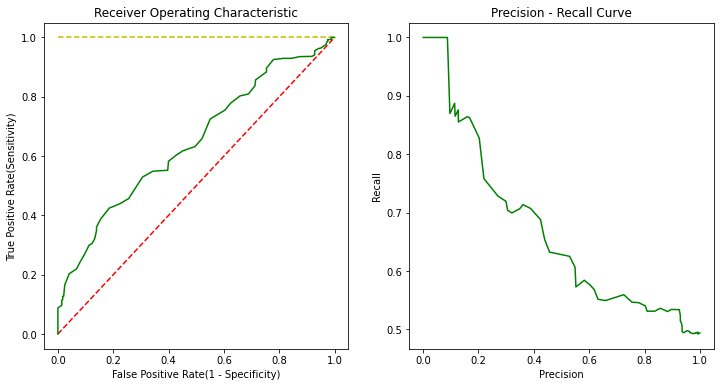

In [29]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from keras import losses, metrics
import matplotlib.pyplot as plt

# moderate pain
false_positive_rate, true_positive_rate, threshold = roc_curve(y_MBP_bin, x_MBP)#, sample_weight = w_samp_min_1)
precision, recall, _ = precision_recall_curve(y_MBP_bin, x_MBP)#, sample_weight = w_samp_min_1)
roc_auc = auc(false_positive_rate, true_positive_rate)
prc_auc = auc(recall, precision)
print('test set AUROC:', roc_auc)
print('test set AUPRC:', prc_auc)



# Plotting ROC, PRC
fig = plt.figure(figsize=(12,6))

# ax1: auroc
ax1 = fig.add_subplot(1,2,1)
ax1.set_title('Receiver Operating Characteristic')
ax1.set_xlabel("False Positive Rate(1 - Specificity)")
ax1.set_ylabel('True Positive Rate(Sensitivity)')
ax1.plot([0,1],[1,1],'y--')
ax1.plot([0,1],[0,1],'r--')
ax1.plot(false_positive_rate, true_positive_rate, 'g', label='moderate pain (AUC = %0.4f)'% roc_auc)

# ax2: auprc
ax2 = fig.add_subplot(1,2,2)
ax2.set_title('Precision - Recall Curve')
ax2.set_xlabel("Precision")
ax2.set_ylabel('Recall')
ax2.plot(recall, precision, 'g', label='moderate pain (AUC = %0.4f)'% prc_auc)

#plt.savefig(test_path + '/roc_prc.png', bbox_inches="tight", pad_inches=0.5)

### 2class 0.5685, 0.5279 / 3 class 0.5934, 0.7077 /old) AUROC 0.5608, AUPRC 0.6384

In [84]:
import itertools
import matplotlib.pyplot as plt


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    plt.figure(figsize=(3,3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    #plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = np.mean(cm) 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.0f}'.format(cm[i, j]),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### confusion matrix

optimal thval: 92.66666412353516
Confusion matrix, without normalization
[[1693 1569]
 [2013 3374]]


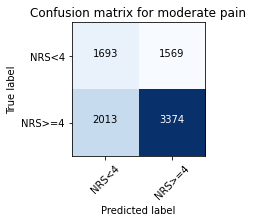

In [85]:
from sklearn.metrics import confusion_matrix, roc_curve


#y_pred = loaded_model.predict(x_test)

### mooderate pain
y_test1 = y_MBP_bin #(y_test_class[:,1]+y_test_class[:,2])==1
y_pred1 = x_MBP #y_pred[:,1]+y_pred[:,2]

# calculate optimal threshold that minimize 'sensitivity(TPR) + specificity(1-FPR)''
fpr, tpr, thvals = roc_curve(y_test1, y_pred1)
optimal_idx = np.argmax(tpr-fpr)
thval = thvals[optimal_idx]
print('optimal thval: {}'.format(thval))
                             
#precision1, recall1, _ = precision_recall_curve(y_test_pacu_bin, y_pred)

# confusion matrix
cnf_matrix = confusion_matrix(y_test1, y_pred1>=thval)
np.set_printoptions(precision=2)
class_names = ['NRS<4','NRS>=4']

plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False, title='Confusion matrix for moderate pain')

# mask check

In [22]:
import numpy as np
import pandas as pd
import os, pickle, sys
from scipy import signal

### input 설정
SRATE = 250 # 250Hz

### 필요한 정보
df_preprocess_pacu = pickle.load(open('../DL_model/cache/preprocess6/df_preprocess_pacu_agender','rb'))
opid_test = pickle.load(open('../DL_model/opid_test', 'rb'))

### Dataframe 및 저장할 list 생성
df_check = pd.DataFrame(columns=['file_path']+[str(i) for i in range(25,58)])
x_check_mask_pacu = []

cnt = 0
for _, row in df_preprocess_pacu.iterrows():
    # 해당 caseid가 test set에 속하는 경우
    if row['opid'] in opid_test:
        cnt += 1
        print('loading data {}/915 ...'.format(cnt), end='')
        df_check.loc[cnt-1,'file_path'] = row['file_path']
        
        
        # 한 NRS에 대해 augmentated된 input 확인
        for i in range(25,58):
            # input이 전처리 통과한 경우
            if row[str(i)][0]:
                if i<30:
                    df_check.loc[cnt-1, str(i)] = 1
                    x_check_mask_pacu.append(True)

                else:
                    x_check_mask_pacu.append(False)


        print('completed')


loading data 1/915 ...completed
loading data 2/915 ...completed
loading data 3/915 ...completed
loading data 4/915 ...completed
loading data 5/915 ...completed
loading data 6/915 ...completed
loading data 7/915 ...completed
loading data 8/915 ...completed
loading data 9/915 ...completed
loading data 10/915 ...completed
loading data 11/915 ...completed
loading data 12/915 ...completed
loading data 13/915 ...completed
loading data 14/915 ...completed
loading data 15/915 ...completed
loading data 16/915 ...completed
loading data 17/915 ...completed
loading data 18/915 ...completed
loading data 19/915 ...completed
loading data 20/915 ...completed
loading data 21/915 ...completed
loading data 22/915 ...completed
loading data 23/915 ...completed
loading data 24/915 ...completed
loading data 25/915 ...completed
loading data 26/915 ...completed
loading data 27/915 ...completed
loading data 28/915 ...completed
loading data 29/915 ...completed
loading data 30/915 ...completed
loading data 31/915

loading data 274/915 ...completed
loading data 275/915 ...completed
loading data 276/915 ...completed
loading data 277/915 ...completed
loading data 278/915 ...completed
loading data 279/915 ...completed
loading data 280/915 ...completed
loading data 281/915 ...completed
loading data 282/915 ...completed
loading data 283/915 ...completed
loading data 284/915 ...completed
loading data 285/915 ...completed
loading data 286/915 ...completed
loading data 287/915 ...completed
loading data 288/915 ...completed
loading data 289/915 ...completed
loading data 290/915 ...completed
loading data 291/915 ...completed
loading data 292/915 ...completed
loading data 293/915 ...completed
loading data 294/915 ...completed
loading data 295/915 ...completed
loading data 296/915 ...completed
loading data 297/915 ...completed
loading data 298/915 ...completed
loading data 299/915 ...completed
loading data 300/915 ...completed
loading data 301/915 ...completed
loading data 302/915 ...completed
loading data 3

loading data 538/915 ...completed
loading data 539/915 ...completed
loading data 540/915 ...completed
loading data 541/915 ...completed
loading data 542/915 ...completed
loading data 543/915 ...completed
loading data 544/915 ...completed
loading data 545/915 ...completed
loading data 546/915 ...completed
loading data 547/915 ...completed
loading data 548/915 ...completed
loading data 549/915 ...completed
loading data 550/915 ...completed
loading data 551/915 ...completed
loading data 552/915 ...completed
loading data 553/915 ...completed
loading data 554/915 ...completed
loading data 555/915 ...completed
loading data 556/915 ...completed
loading data 557/915 ...completed
loading data 558/915 ...completed
loading data 559/915 ...completed
loading data 560/915 ...completed
loading data 561/915 ...completed
loading data 562/915 ...completed
loading data 563/915 ...completed
loading data 564/915 ...completed
loading data 565/915 ...completed
loading data 566/915 ...completed
loading data 5

loading data 827/915 ...completed
loading data 828/915 ...completed
loading data 829/915 ...completed
loading data 830/915 ...completed
loading data 831/915 ...completed
loading data 832/915 ...completed
loading data 833/915 ...completed
loading data 834/915 ...completed
loading data 835/915 ...completed
loading data 836/915 ...completed
loading data 837/915 ...completed
loading data 838/915 ...completed
loading data 839/915 ...completed
loading data 840/915 ...completed
loading data 841/915 ...completed
loading data 842/915 ...completed
loading data 843/915 ...completed
loading data 844/915 ...completed
loading data 845/915 ...completed
loading data 846/915 ...completed
loading data 847/915 ...completed
loading data 848/915 ...completed
loading data 849/915 ...completed
loading data 850/915 ...completed
loading data 851/915 ...completed
loading data 852/915 ...completed
loading data 853/915 ...completed
loading data 854/915 ...completed
loading data 855/915 ...completed
loading data 8

,file_path,25,26,27,28,29,30,31,32,33,...,48,49,50,51,52,53,54,55,56,57
0,"5.0,2038,PACU1_3_190902_160501.vital",1,1,1,1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"3.0,5312,PACU1_1_200521_214609.vital",1,1,1,1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"7.0,4085,PACU1_8_200228_093013.vital",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"3.0,3738,PACU1_5_200214_151543.vital",NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"7.0,8990,PACU1_4_190902_133811.vital",1,1,1,1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910,"3.0,7249,PACU1_3_200830_195222.vital",1,1,1,1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
911,"5.0,3170,PACU1_6_200121_115121.vital",1,1,1,1,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912,"7.0,1963,PACU1_6_190829_162858.vital",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
913,"4.0,8531,PACU1_1_190409_144536.vital",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
x_test_pacu = np.load('../DL_model/dataset/preprocess6/input/x_test_pacu.npz',allow_pickle = True)['arr_0']
len(x_test_pacu),len(x_check_mask_pacu)

(14522, 14522)